In [31]:
using LinearAlgebra, Distributions

In [32]:
using Plots 

In [35]:
#remark endで閉じる
n=10
for i=(n-1):-1:1
    println(i)
end

9
8
7
6
5
4
3
2
1


## β-Hermite ensembles

* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.308.6290&rep=rep1&type=pdf
<img src="hermite.png" width=50%>

In [4]:
T(n,β)=SymTridiagonal(rand(Normal(0,√(2β)),n),[rand(Chi(i*β)) for i=(n-1):-1:1])

T (generic function with 1 method)

In [5]:
# example：real case(β=1)
T(10,1)

10×10 SymTridiagonal{Float64,Array{Float64,1}}:
 0.840629   2.89577     ⋅        ⋅        …    ⋅         ⋅         ⋅ 
 2.89577   -0.461222   3.29397   ⋅             ⋅         ⋅         ⋅ 
  ⋅         3.29397   -1.4603   3.18298        ⋅         ⋅         ⋅ 
  ⋅          ⋅         3.18298  0.974621       ⋅         ⋅         ⋅ 
  ⋅          ⋅          ⋅       1.47758        ⋅         ⋅         ⋅ 
  ⋅          ⋅          ⋅        ⋅        …    ⋅         ⋅         ⋅ 
  ⋅          ⋅          ⋅        ⋅            0.997967   ⋅         ⋅ 
  ⋅          ⋅          ⋅        ⋅           -1.76115   1.63973    ⋅ 
  ⋅          ⋅          ⋅        ⋅            1.63973   0.267094  0.818884
  ⋅          ⋅          ⋅        ⋅             ⋅        0.818884  0.00470878

In [6]:
n=1000;β=1;
@time F=eigen(T(n,β)/√(β*n))
list=F.values;

  0.486452 seconds (546.70 k allocations: 35.918 MiB, 3.31% gc time)


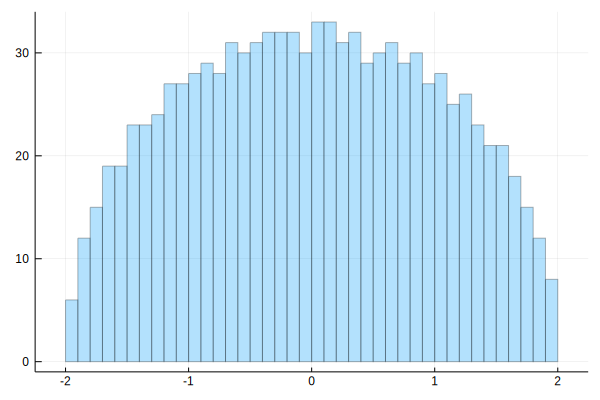

In [7]:
plot(size=(600, 320))
histogram(list,legend=false,norm=false,alpha=0.3,bin=-2:0.1:2)

In [11]:
@which eigen(T(n, β)/√(n*β))

eigen(A::SymTridiagonal{T,V} where V<:AbstractArray{T,1}) where T in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/tridiag.jl:280

## β-Laguerre ensembles

<img src="laguerre.png" width=50%>

In [36]:
B(n,m,β)=Bidiagonal([rand(Chi(i*β)) for i=n:-1:(n-m+1)],[rand(Chi(i*β)) for i=m-1:-1:1],:L)

B (generic function with 1 method)

In [37]:
# n*m 
n=1000
m=300
β=1;
X=B(n,m,β);
X=Array(X);

In [38]:
W=Transpose(X)*X
@time list1=eigen(W).values;

  0.380272 seconds (344.17 k allocations: 19.415 MiB)


In [39]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1.0;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

<img src="mp-law.png" width=50%>

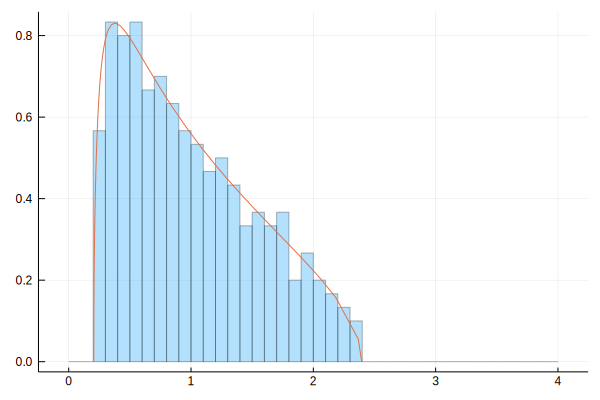

In [40]:
histogram(list1/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b;)

  0.062690 seconds (13 allocations: 4.157 MiB)


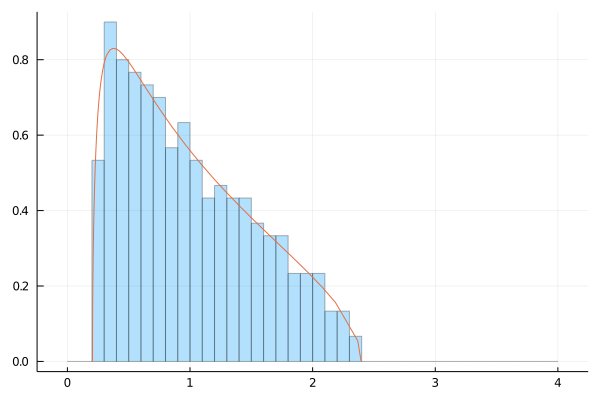

In [18]:
@time list=svd(X).S
histogram(list.^2/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b;)

## 課題1

In [116]:
list=[]
size=10^6;
β=1;
n=100;
@time for i=1:size
    append!(list,tr(T(n,β)))
end
mean(list)

  8.564603 seconds (9.00 M allocations: 2.631 GiB, 7.43% gc time)


0.015079153419959565

## Forrester(2013) ：β-spiked Wishart ensembles
### 論文タイトル：Probability densities and distributions for spiked and general variance Wishart β-ensembles 

<img src="forrester_model.png" width=70%>

In [127]:
β=1;
n=8;
m=4;
X=B(n,m,β)
X=Array(X)
X[1:1]=(√2)*X[1:1] #b=2 by Forrester
X

4×4 Array{Float64,2}:
 4.16671   0.0      0.0       0.0
 0.761603  1.80263  0.0       0.0
 0.0       1.28601  3.87031   0.0
 0.0       0.0      0.639745  1.91369

In [41]:
list=[]
size=10^6;
β=1;
n=30;
m=20;
b=4^3;
@time for i=1:size
    X=B(n,m,β)
    X=Array(X)
    X[1:1]=(√b)*X[1:1]
    F=maximum(svd(X).S)^2
    append!(list,F)
end
mean(list/b)

138.075013 seconds (22.00 M allocations: 24.894 GiB, 4.95% gc time)


30.303852342594816

In [ ]:
using Plots
using StatPlots

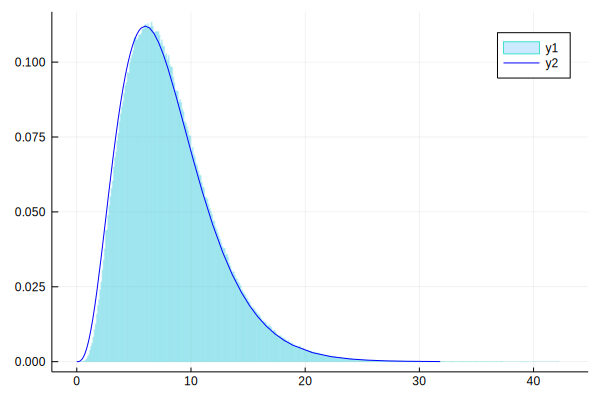

In [19]:
d=Chisq(n)
histogram(list/b,norm=true,alpha=0.2,linecolor =:turquoise)
plot!(d,linecolor=:blue)

## MP則とスパイクモデル

In [208]:
n=5000;
m=300;
b1=2;
X=B(n,m,β)
X=Array(X)
X[1:1]=(√b1)*X[1:1]

1-element Array{Float64,1}:
 100.87856353203453

In [209]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

  0.052372 seconds (13 allocations: 4.157 MiB)


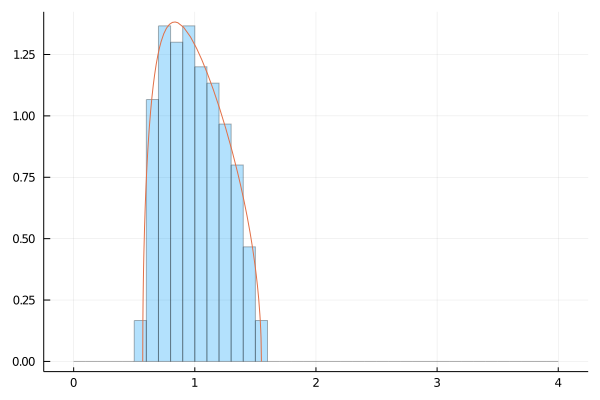

In [207]:
#スパイクモデルで検証
#n=5000;m=300;b1=1.3;
@time list=svd(X).S
histogram(list.^2/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b;)

  0.036191 seconds (13 allocations: 4.157 MiB)


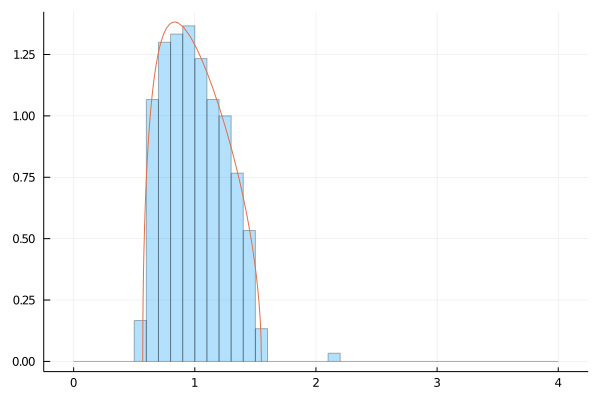

In [210]:
#スパイクモデルで検証
#n=5000;m=300;b1=2;
@time list=svd(X).S
histogram(list.^2/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b;)